机器学习项目流程:

数据探索 --> 设计方案 --> 数据清洗/特征工程 --> 构造数据集 --> 训练/调参

导入必要的包

In [1]:
import numpy as np  #向量计算库
import pandas as pd   #基于numpy的dataframe工具
from keras.utils import np_utils   # keras下数据处理工具

np.random.seed(10)
from keras.datasets import mnist   # mnist数据集

from keras.models import Sequential  # 贯序建模模式
from keras.layers import Dense    # 全连接层神经元

import matplotlib.pyplot as plt   # 绘图库 

Using TensorFlow backend.


In [2]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示
    plt.show()
    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()
    
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

观察数据集

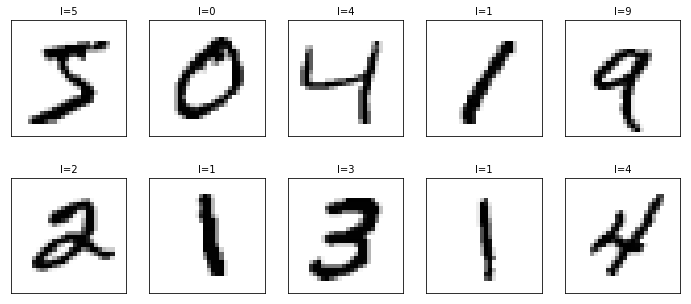

In [3]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()  # 载入训练数据集与测试数据集

plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10) #绘制数据与label 

![](https://github.com/caiyongji/machine-learning-mindmap-cn/raw/master/img/DataDrocessing/%E6%9E%84%E9%80%A0%E6%95%B0%E6%8D%AE%E9%9B%86.png)

In [4]:
print('训练集的数据格式:{}'.format(X_train_image.shape),  ' |测试集的标签格式:{}'.format(y_train_label.shape))
print('测试集的数据格式:{}'.format(X_test_image.shape),  ' |测试集的标签格式:{}'.format(y_test_label.shape))

训练集的数据格式:(60000, 28, 28)  |测试集的标签格式:(60000,)
测试集的数据格式:(10000, 28, 28)  |测试集的标签格式:(10000,)


In [5]:
np.unique(X_train_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

检查训练数据中，是否存在巨大偏差

In [6]:
unique, counts = np.unique(y_train_label, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

首先规整图像数据

In [7]:
x_Train = X_train_image.reshape(60000, 28*28).astype('float32')
x_Test = X_test_image.reshape(10000, 28*28).astype('float32')
print("\t xTrain数据格式: %s" % (str(x_Train.shape)))
print("\t xTest数据格式: %s" % (str(x_Test.shape)))

	 xTrain数据格式: (60000, 784)
	 xTest数据格式: (10000, 784)


![](https://github.com/caiyongji/machine-learning-mindmap-cn/raw/master/img/DataDrocessing/%E7%89%B9%E5%BE%81%E5%BD%92%E4%B8%80%E5%8C%96(Normalisation)%E6%88%96%E7%BC%A9%E6%94%BE(Scaling).png)

同时将图片的灰度值压缩到 0-1之间

In [8]:
x_Train_norm = x_Train/255
x_Test_norm = x_Test/255
np.unique(x_Train_norm)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
       0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
       0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
       0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
       0.27450982, 0.2784314 , 0.28235295, 0.28627452, 0.29019

将label转换为 one-hot 的格式

In [9]:
y_TrainOneHot = np_utils.to_categorical(y_train_label) # 將 training 的 label 進行 one-hot encoding
y_TestOneHot = np_utils.to_categorical(y_test_label) # 將測試的 labels 進行 one-hot encoding
y_TrainOneHot.shape

(60000, 10)

![](https://gombru.github.io/assets/cross_entropy_loss/multiclass_multilabel.png)

构建计算模型

In [10]:
model = Sequential()  # 定义一个新模型
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) #定义一个256维的隐藏层
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # 定义一个10维的输出层

softmax激活函数图
![](https://gombru.github.io/assets/cross_entropy_loss/sigmoid.png)

构建损失函数

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

参数说明:
* **loss** : 使用 cross_entropy (Cross entropy) 交叉熵.  ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/0cb6da032ab424eefdca0884cd4113fe578f4293)
* **optimizer** : 随机梯度下降.
* **metrics** : 使用准确率进行评估

交叉熵损失计算

![](img/cross_entropy.jpg)

![](img/fit.png)

In [12]:
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot ,validation_split=0.2, epochs=130, batch_size=50, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/130
 - 12s - loss: 1.0034 - acc: 0.7726 - val_loss: 0.4973 - val_acc: 0.8752
Epoch 2/130
 - 3s - loss: 0.4522 - acc: 0.8809 - val_loss: 0.3722 - val_acc: 0.8978
Epoch 3/130
 - 3s - loss: 0.3723 - acc: 0.8980 - val_loss: 0.3287 - val_acc: 0.9065
Epoch 4/130
 - 3s - loss: 0.3340 - acc: 0.9074 - val_loss: 0.3029 - val_acc: 0.9161
Epoch 5/130
 - 3s - loss: 0.3086 - acc: 0.9132 - val_loss: 0.2826 - val_acc: 0.9203
Epoch 6/130
 - 3s - loss: 0.2890 - acc: 0.9191 - val_loss: 0.2676 - val_acc: 0.9245
Epoch 7/130
 - 3s - loss: 0.2730 - acc: 0.9235 - val_loss: 0.2549 - val_acc: 0.9282
Epoch 8/130
 - 3s - loss: 0.2589 - acc: 0.9270 - val_loss: 0.2431 - val_acc: 0.9308
Epoch 9/130
 - 3s - loss: 0.2466 - acc: 0.9307 - val_loss: 0.2330 - val_acc: 0.9347
Epoch 10/130
 - 3s - loss: 0.2355 - acc: 0.9336 - val_loss: 0.2248 - val_acc: 0.9370
Epoch 11/130
 - 3s - loss: 0.2253 - acc: 0.9368 - val_loss: 0.2164 - val_acc: 0.9399
Epoch 12/130
 - 3s - lo

Epoch 97/130
 - 3s - loss: 0.0405 - acc: 0.9904 - val_loss: 0.0835 - val_acc: 0.9747
Epoch 98/130
 - 3s - loss: 0.0401 - acc: 0.9909 - val_loss: 0.0835 - val_acc: 0.9748
Epoch 99/130
 - 3s - loss: 0.0395 - acc: 0.9908 - val_loss: 0.0832 - val_acc: 0.9751
Epoch 100/130
 - 3s - loss: 0.0390 - acc: 0.9910 - val_loss: 0.0830 - val_acc: 0.9748
Epoch 101/130
 - 3s - loss: 0.0385 - acc: 0.9913 - val_loss: 0.0831 - val_acc: 0.9750
Epoch 102/130
 - 3s - loss: 0.0380 - acc: 0.9914 - val_loss: 0.0831 - val_acc: 0.9751
Epoch 103/130
 - 3s - loss: 0.0376 - acc: 0.9914 - val_loss: 0.0827 - val_acc: 0.9753
Epoch 104/130
 - 3s - loss: 0.0371 - acc: 0.9918 - val_loss: 0.0824 - val_acc: 0.9751
Epoch 105/130
 - 3s - loss: 0.0366 - acc: 0.9918 - val_loss: 0.0823 - val_acc: 0.9755
Epoch 106/130
 - 3s - loss: 0.0362 - acc: 0.9920 - val_loss: 0.0822 - val_acc: 0.9754
Epoch 107/130
 - 3s - loss: 0.0358 - acc: 0.9922 - val_loss: 0.0823 - val_acc: 0.9756
Epoch 108/130
 - 3s - loss: 0.0353 - acc: 0.9924 - val_lo

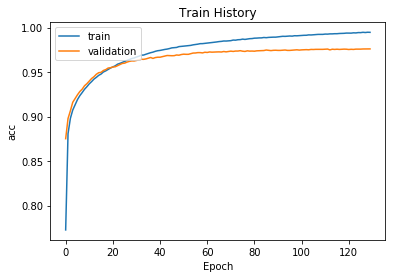

In [13]:
show_train_history(train_history, 'acc', 'val_acc')

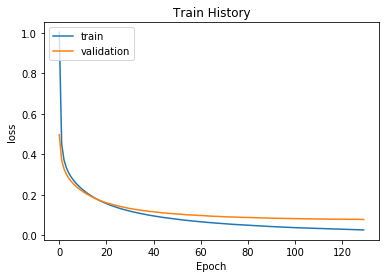

In [14]:
show_train_history(train_history, 'loss', 'val_loss')

欠拟合与过拟合
![](img/overfit.jpg)

In [15]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 30us/step
	[Info] Accuracy of testing data = 97.9%


[5 9 8 7 2 3 0 2 4 2]



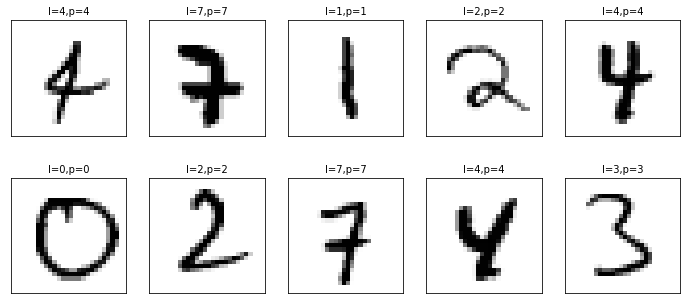

In [16]:
prediction = model.predict_classes(x_Test_norm)  # Making prediction and save result to prediction  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=300)